In [1]:
import json
import os

results_dir = "results/"
json_files = [pos_json for pos_json in os.listdir(results_dir) if pos_json.endswith('.json')]

data = []
for index, json_fn in enumerate(json_files):
    with open(os.path.join(results_dir, json_fn)) as in_file:
        fusion_group = json_fn.removesuffix('.json')
        content = json.load(in_file)
        data.extend(content)

In [2]:
# This is a single invocation
# data[0]

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

df = pd.DataFrame.from_dict(data)

# Get the smallest Start timestamp and remove it from every timestamp value
min_start_timestamp = df["startTimestamp"].min()
df["startTimestamp"] = df["startTimestamp"] - min_start_timestamp
df["endTimestamp"] = df["endTimestamp"] - min_start_timestamp

df.head()

,traceId,fusionGroup,source,currentFunction,billedDuration,maxMemoryUsed,isRootInvocation,startTimestamp,endTimestamp,internalDuration,calls
0,08a4490e938a3546,"A.B.C.D.E.G,F",A,A,2556,101,True,81609,84151,2520,"[{'called': 'G', 'caller': 'A', 'local': True,..."
1,7782953ec50dbe0f,"A.B.C.D.E.G,F",A,A,1402,120,True,85232,86634,1401,"[{'called': 'G', 'caller': 'A', 'local': True,..."
2,09b1ae114a117fbc,"A.B.C.D.E.G,F",A,A,1031,120,True,87701,88731,1029,"[{'called': 'G', 'caller': 'A', 'local': True,..."
3,1fb9d9aee8daad45,"A.B.C.D.E.G,F",A,A,930,120,True,89809,90730,928,"[{'called': 'G', 'caller': 'A', 'local': True,..."
4,1123c222968ad6f7,"A.B.C.D.E.G,F",A,A,976,120,True,91817,92792,974,"[{'called': 'G', 'caller': 'A', 'local': True,..."


In [4]:
print(f'Unique Invocations: {df["traceId"].nunique()}')

Unique Invocations: 162


<AxesSubplot:xlabel='startTimestamp', ylabel='traceId'>

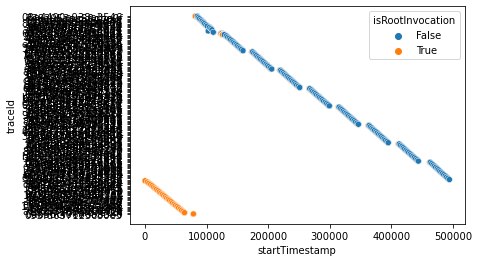

In [5]:
sns.scatterplot(data=df, x="startTimestamp", y="traceId", hue=df["isRootInvocation"])

<AxesSubplot:xlabel='startTimestamp', ylabel='billedDuration'>

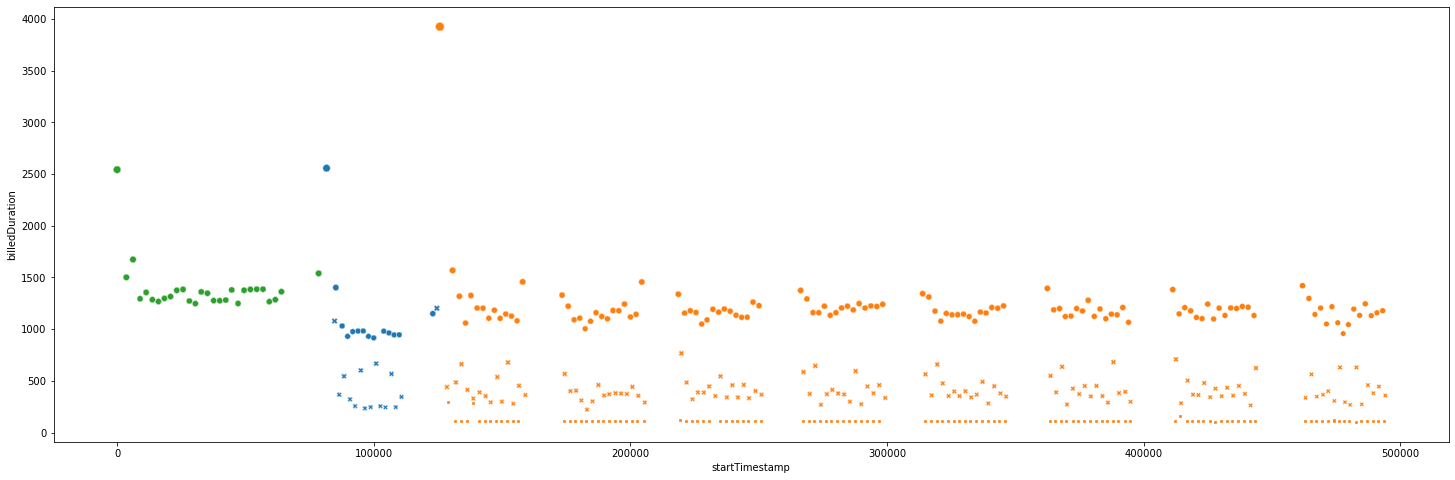

In [6]:
plt.figure(figsize=(25,8))
sns.scatterplot(data=df, x="startTimestamp", y="billedDuration", size="billedDuration", hue=df["fusionGroup"], style="currentFunction", legend=None)

<AxesSubplot:xlabel='startTimestamp', ylabel='10s_billedDuration_avg'>

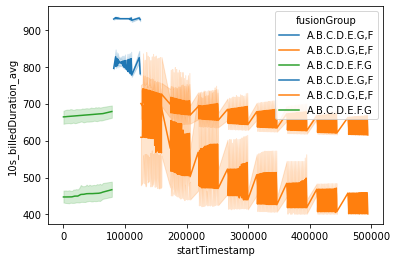

In [7]:
df['10s_billedDuration_avg'] = df['billedDuration'].rolling(10000, min_periods=30).mean()
df['10s_billedDuration_med'] = df['billedDuration'].rolling(10000, min_periods=30).median()
sns.lineplot(data=df, x="startTimestamp", y="10s_billedDuration_avg", hue=df["fusionGroup"])
sns.lineplot(data=df, x="startTimestamp", y="10s_billedDuration_med", hue=df["fusionGroup"])
#sns.scatterplot(data=df, x="startTimestamp", y="billedDuration", hue=df["fusionGroup"], legend=None)

<AxesSubplot:xlabel="('startTimestamp', 'min')", ylabel="('billedDuration', 'sum')">

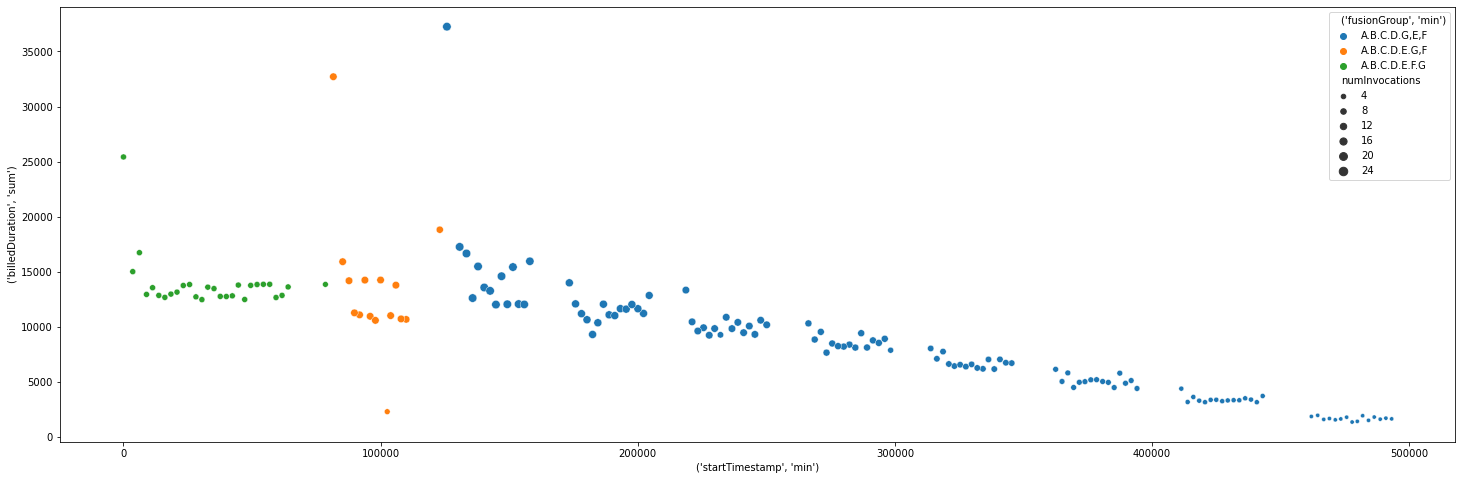

In [8]:
plt.figure(figsize=(25,8))
# Now do not count every invocation, but sort the df by the cost of trace
grouped = df.groupby('traceId').agg({'billedDuration': ['sum'], 'startTimestamp': ['min'], 'endTimestamp': ['max'], 'fusionGroup': 'min'})
#grouped['numInvocations'] = df.groupby('traceId').count()
grouped['numInvocations'] = df.groupby('traceId').size()
sns.scatterplot(data=grouped, x=grouped['startTimestamp', 'min'] , y=grouped['billedDuration', 'sum'], hue=grouped['fusionGroup', 'min'], size="numInvocations")

In [9]:

grouped

,billedDuration,startTimestamp,endTimestamp,fusionGroup,numInvocations
,sum,min,max,min,
traceId,,,,,
0104f453d39afe93,9303,182409,183411,"A.B.C.D.G,E,F",21
028e37a21c3ef3dd,9918,225569,226728,"A.B.C.D.G,E,F",18
02a7e69790e031a1,8910,296032,297421,"A.B.C.D.G,E,F",15
042ff93ca28a6c94,11214,202227,203381,"A.B.C.D.G,E,F",21
08a4490e938a3546,32706,81609,85804,"A.B.C.D.E.G,F",18
...,...,...,...,...,...
f568c7ad7f03c683,17256,130729,132520,"A.B.C.D.G,E,F",24
f86e84a783f57578,10310,266355,268042,"A.B.C.D.G,E,F",15
